### 데이터를 조금 더 익숙하게 다루기 위해 학원수업 왜 동영상을 보면 추가 공부함
### 사이트  : https://www.boostcourse.org/ds112/joinLectures/28137

In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

# plt.ro("font", family = "Malgun Gothic")
# 윈도우에서 한글폰트 설정
# plt.ro("font", family = "AppleGothic")
# Mac에서 한글 폰트 설정

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)


## 음주 여부에 따라 건강검진 수치 차이가 있을까?
##  신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

* 분석을 통해 가설을 검정해 보기


## __2.1 데이터 불러오기__

In [6]:
df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV", encoding="cp949")
df.shape

(1000000, 31)

## __2.2 데이터 확인하기__

In [7]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [8]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
999999,2020,1000000,28,1,11,160,55,76.1,2.0,2.0,...,0.9,17.0,13.0,24.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [9]:
df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
358568,2020,358569,45,1,16,165,50,74.0,9.9,0.5,...,0.9,18.0,10.0,12.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [11]:
# 기본정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [13]:
# 불필요한 컬럼이 있는지 확인하기
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [14]:
df.dtypes

기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

## __2.3 결측치 확인하고 요약, 집계하기 - info,isnull,value_counts__

### 2.3.1 곁측치 집계하기

In [18]:
# 결측치 요약 및 집계하기
df.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

### 2.3.2 집계한 결측치 그래프로 나타내기

<AxesSubplot:>

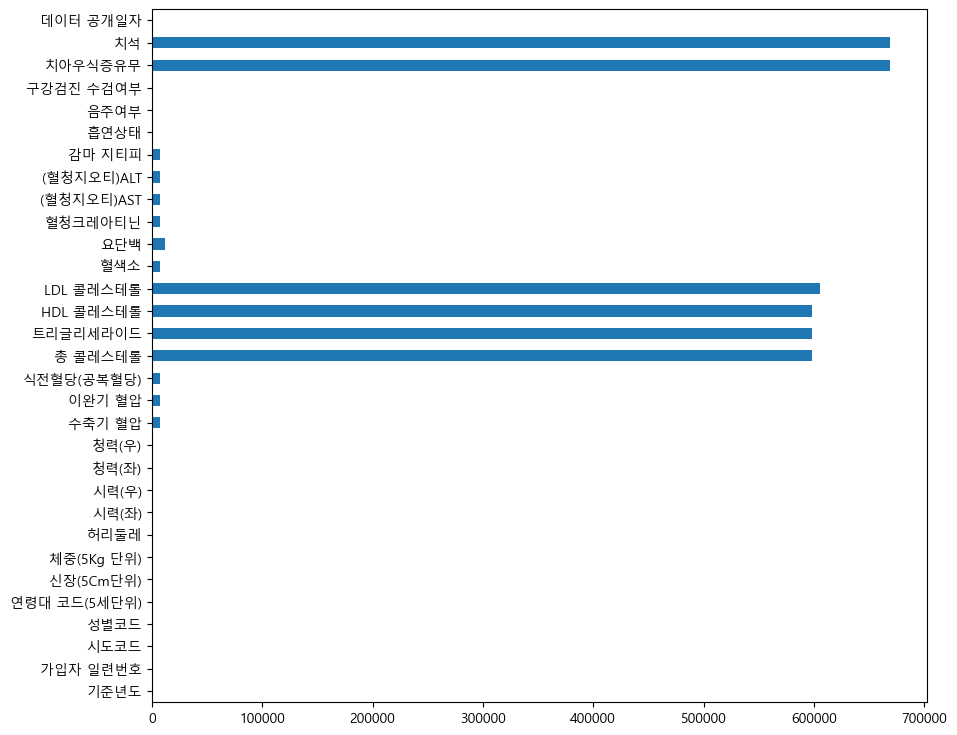

In [24]:
isnull_sum = df.isnull().sum()
df.isnull().sum().plot.barh(figsize=(10, 9))
# isnull_sum

### 2.3.3 일부 데이터 요약하기

In [31]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()
# 중앙값에 비해 평균값이 높음
# 평균값은 max 값에 의해 영향을 영향을 많이 받음

,(혈청지오티)ALT,(혈청지오티)AST
count,992398.000000,992399.000000
mean,26.759641,27.698337
std,25.835091,25.286659
min,1.000000,1.000000
25%,16.000000,20.000000
50%,21.000000,24.000000
75%,31.000000,30.000000
max,5990.000000,8712.000000


### 2.3.4 값 집계하기

In [33]:
df["성별코드"].value_counts()

1    510689
2    489311
Name: 성별코드, dtype: int64

In [35]:
df["흡연상태"].value_counts()
# 1 : 흡연하지 않는 사람 /  2 : 흡연하는 사람 / 3 : 흡연했지만 금연한 사람

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64

## __2.4 groupBy와 pivot_table로 다양한 집계 연산 하기__
- 2개 이상의 데이터를 보기 위해서 groupby와 pivot_table을 사용

### 2.4.1 Groupby

In [41]:
# 성별코드 값에 따른 모든 열에 대한 평균
# 성별에 따라 각 열에서 여성과 남성의 평균 차이를 알고 싶을 때

df.groupby(["성별코드"]).mean()


,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2020.0,500358.619823,34.283801,11.778801,167.452735,69.713162,86.164883,0.98318,0.988278,1.048482,...,1.143432,0.968119,29.336907,31.001443,49.718945,2.014826,0.741792,0.362892,0.182544,0.610137
2,2020.0,499626.733920,33.801335,12.062784,154.191945,56.117776,78.382718,0.88072,0.879468,1.044093,...,1.100177,0.730214,25.980277,22.312075,25.258336,1.080009,0.420934,0.298499,0.150885,0.552335


In [42]:
#성별코드 값에 따라 모든 열에 대한 개수
# 여성과 남성이 각 열에서 검사한 인원 차이가 얼마나 나는지 확인하고 싶을 때

df.groupby(["성별코드"]).count()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,510689,510689,510689,510689,510689,510689,510648,510561,510563,510585,...,507950,507950,507949,507950,510526,510611,510689,185325,185324,510689
2,489311,489311,489311,489311,489311,489311,489244,489182,489185,489193,...,484448,484449,484449,484447,489131,489193,489311,146058,146058,489311


In [52]:
# 성별에 따른 음주상태를 확인하고 싶을 때, (음주하면 1, 안하면 0)
# 가입자 일련번호는 고유번호로 개수를 세기위해 넣음
# 음주는 남성 > 여성 이라는 것을 알 수 있음

df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [60]:
# 음주는 하는 사람이 간수치가 높다는 것을 알 수 있음
# 남성이 대체로 높다는 것을 알 수 있음

df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()
# max 값 때문에 평균값이 편향되었다는 사실을 알 수 있음
# max : 999

count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [63]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

### 2.4.2 Pivot
- pivot은 연산을 하지 않고 데이터의 구조를 바꾸고자 할 때 사용
- pivot_table의 연산 속도가 groupby보다 빠르고, 사용 방법이 직관적
- pivot_table에서 할 수 있는 것은 groupby에서 대부분 할 수 있고, groupby에서 할 수 있는 것은 pivot_table에서 할 수 있음

In [66]:
df.pivot_table(index="성별코드", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
성별코드,
1,510689
2,489311


In [68]:
df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [70]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,15.0,20.0,30.0,409136.0,1731.0,27.368548,1.0,31.423282
1.0,18.0,28.0,48.0,583065.0,2630.0,45.084373,1.0,61.210826


In [73]:
df.groupby(by=["음주여부"])["감마 지티피"].describe()

,count,mean,std,min,25%,50%,75%,max
음주여부,,,,,,,,
0.0,409136.0,27.368548,31.423282,1.0,15.0,20.0,30.0,1731.0
1.0,583065.0,45.084373,61.210826,1.0,18.0,28.0,48.0,2630.0


In [77]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마 지티피", aggfunc="describe")

# df.groupby(by=["음주여부", "성별코드"])["감마 지티피"].describe()

25%   50%   75%     count     max       mean  min        std
음주여부 성별코드                                                               
0.0  1     18.0  25.0  37.0  130103.0  1731.0  34.212195  1.0  38.533470
     2     14.0  18.0  26.0  279033.0   999.0  24.177603  1.0  26.897676
1.0  1     24.0  36.0  60.0  377769.0  2630.0  55.059597  1.0  69.135224
     2     14.0  18.0  27.0  205296.0   999.0  26.728777  1.0  36.415153